In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from time import localtime, strftime

In [11]:
learning_rate = 0.1
training_epochs = 50000
display_step = 100
# n_idle_epochs = 1000
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=n_idle_epochs, min_delta=0.00001)

def scheduler(epoch, lr):
    if lr <= 0.01:
        return lr
    if epoch % 200 == 0:
        return lr * 0.8
    else:
        return lr

reduce_lr = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [12]:
class NEPOCHLogger(tf.keras.callbacks.Callback):
    def __init__(self, per_epoch=100):
        super(NEPOCHLogger, self).__init__()
        self.seen = 0
        self.per_epoch = per_epoch

    def on_epoch_end(self, epoch, logs=None):
        if epoch % self.per_epoch == 0:
            print('Epoch {}, loss {:.8f}, train_accuracy {:.8f}'.format(epoch, logs['loss'], logs['acc']))

log_display = NEPOCHLogger(per_epoch=display_step)

In [13]:
class MLQPLayer(tf.keras.layers.Layer):
    def __init__(self, n_outputs):
        super(MLQPLayer, self).__init__()
        self.n_outputs = n_outputs

    def build(self, input_shape):
        self.mu = self.add_weight('mu', shape=[int(input_shape[-1]), self.n_outputs])
        self.nu = self.add_weight('nu', shape=[int(input_shape[-1]), self.n_outputs])
        self.bias = self.add_weight('bias', shape=[1, self.n_outputs])

    def call(self, inputs, *args, **kwargs):
        return tf.matmul(inputs*inputs, self.mu) + tf.matmul(inputs, self.nu) + self.bias

In [14]:
train_data = pd.read_csv(r'two_spiral_train_data.txt', header=None, sep='\s+')
test_data = pd.read_csv(r'two_spiral_test_data.txt', header=None, sep='\s+')

train_X = tf.convert_to_tensor(np.asarray(train_data.iloc[:, 0:2]))
train_y = tf.convert_to_tensor(np.asarray(train_data.iloc[:, 2]))
test_X = tf.convert_to_tensor(np.asarray(test_data.iloc[:, 0:2]))
test_y = tf.convert_to_tensor(np.asarray(test_data.iloc[:, 2]))

In [15]:
def plot_and_show(title, class_0, class_1, style_0, style_1, path, ms=6):
    plt.axes().set_facecolor('gray')
    plt.title(title)
    plt.plot(class_0[0].tolist(), class_0[1].tolist(), style_0, label='class 0', markersize=ms)
    plt.plot(class_1[0].tolist(), class_1[1].tolist(), style_1, label='class 1', markersize=ms)
    plt.savefig(path)
    plt.show()

In [16]:
model = tf.keras.Sequential([
    MLQPLayer(128),
    tf.keras.layers.Activation('swish'),
    MLQPLayer(2),
    tf.keras.layers.Activation('softmax')
])

Epoch 0, loss 7.91141462, train_accuracy 0.53333336
Epoch 100, loss 0.46373251, train_accuracy 0.75666666
Epoch 200, loss 0.34562460, train_accuracy 0.83999997
Epoch 300, loss 0.28861350, train_accuracy 0.87333333
Epoch 400, loss 0.18608208, train_accuracy 0.95999998
Epoch 500, loss 0.11569858, train_accuracy 0.97666669
Epoch 600, loss 0.06061444, train_accuracy 0.99000001
Epoch 700, loss 0.16940515, train_accuracy 0.94666666
Epoch 800, loss 0.03786073, train_accuracy 1.00000000
Epoch 900, loss 0.02496774, train_accuracy 0.99666667
Epoch 1000, loss 0.02239226, train_accuracy 1.00000000
Epoch 1100, loss 0.01772489, train_accuracy 1.00000000
Epoch 1200, loss 0.01425605, train_accuracy 1.00000000
Epoch 1300, loss 0.02000704, train_accuracy 1.00000000
Epoch 1400, loss 0.01177801, train_accuracy 1.00000000
Epoch 1500, loss 0.01041541, train_accuracy 1.00000000
Epoch 1600, loss 0.00942377, train_accuracy 1.00000000
Epoch 1700, loss 0.00883854, train_accuracy 1.00000000
Epoch 1800, loss 0.007

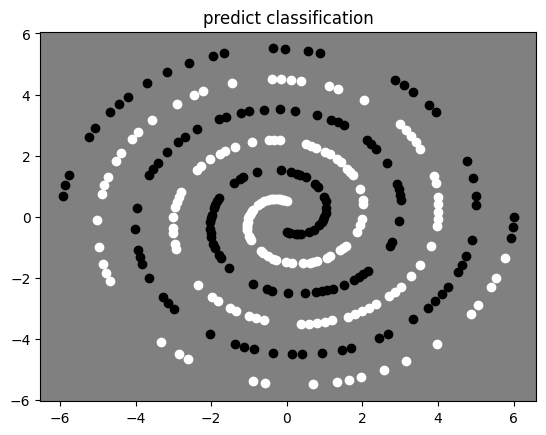

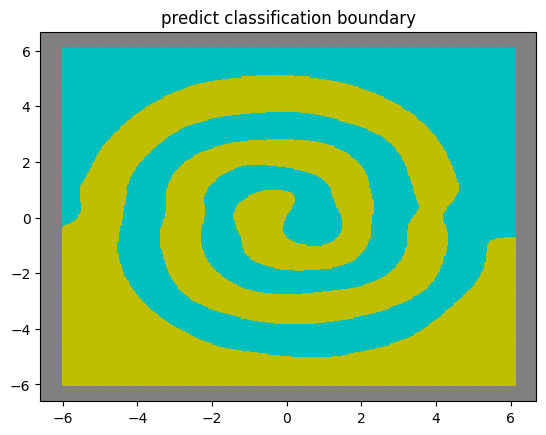

Epoch 0, loss 0.00021486, train_accuracy 1.00000000
Epoch 100, loss 0.06864324, train_accuracy 0.99333334
Epoch 200, loss 0.05211652, train_accuracy 0.99333334
Epoch 300, loss 0.04051818, train_accuracy 1.00000000
Epoch 400, loss 0.14087543, train_accuracy 0.92666668
Epoch 500, loss 0.12570585, train_accuracy 0.94999999
Epoch 600, loss 0.12032701, train_accuracy 0.96666664
Epoch 700, loss 0.14718895, train_accuracy 0.94333333
Epoch 800, loss 0.12723954, train_accuracy 0.94999999
Epoch 900, loss 0.13531904, train_accuracy 0.87333333
Epoch 1000, loss 0.14386736, train_accuracy 0.91333336
Epoch 1100, loss 0.10203075, train_accuracy 0.97000003
Epoch 1200, loss 0.15843180, train_accuracy 0.86000001
Epoch 1300, loss 0.16251074, train_accuracy 0.81000000
Epoch 1400, loss 0.14516391, train_accuracy 0.96333331
Epoch 1500, loss 0.15733215, train_accuracy 0.90333331
Epoch 1600, loss 0.15341984, train_accuracy 0.81333333
Epoch 1700, loss 0.16313545, train_accuracy 0.80333334
Epoch 1800, loss 0.155

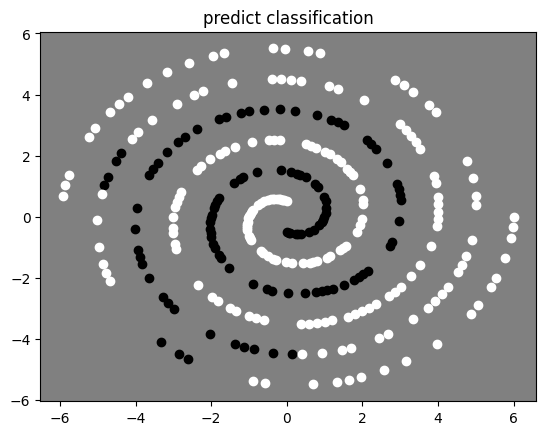

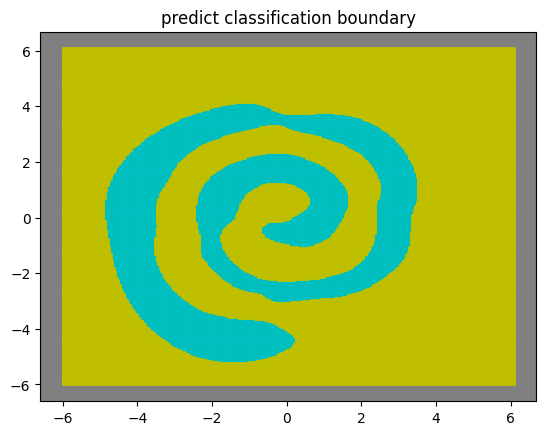

Epoch 0, loss 0.20571002, train_accuracy 0.83333331
Epoch 100, loss 0.20563072, train_accuracy 0.82666665
Epoch 200, loss 0.20555690, train_accuracy 0.83333331
Epoch 300, loss 0.20548496, train_accuracy 0.82999998
Epoch 400, loss 0.20546204, train_accuracy 0.82666665
Epoch 500, loss 0.20539948, train_accuracy 0.82999998
Epoch 600, loss 0.20534062, train_accuracy 0.82999998
Epoch 700, loss 0.20531254, train_accuracy 0.82999998
Epoch 800, loss 0.20528899, train_accuracy 0.82999998
Epoch 900, loss 0.20524342, train_accuracy 0.82999998
Epoch 1000, loss 0.20517576, train_accuracy 0.82999998
Epoch 1100, loss 0.20517640, train_accuracy 0.82999998
Epoch 1200, loss 0.20508020, train_accuracy 0.82999998
Epoch 1300, loss 0.20501417, train_accuracy 0.82999998
Epoch 1400, loss 0.20495988, train_accuracy 0.83666664
Epoch 1500, loss 0.20491275, train_accuracy 0.83666664
Epoch 1600, loss 0.20489521, train_accuracy 0.82999998
Epoch 1700, loss 0.20483491, train_accuracy 0.83333331
Epoch 1800, loss 0.204

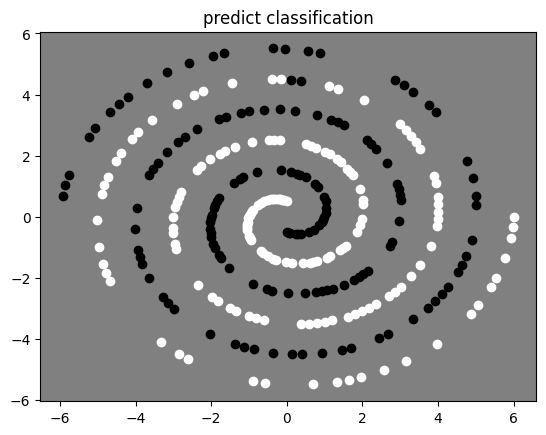

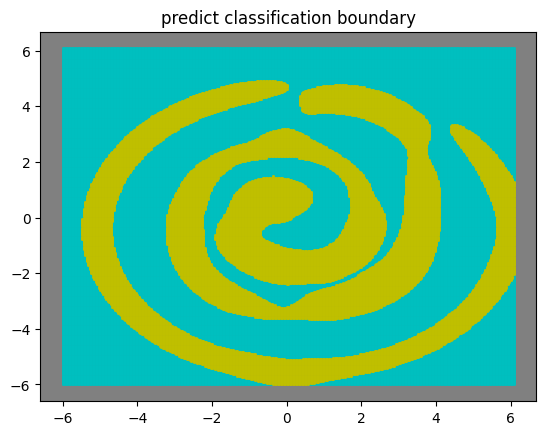

Epoch 0, loss 0.00665717, train_accuracy 1.00000000
Epoch 100, loss 0.00659456, train_accuracy 1.00000000
Epoch 200, loss 0.00659459, train_accuracy 1.00000000
Epoch 300, loss 0.00657934, train_accuracy 1.00000000
Epoch 400, loss 0.00657692, train_accuracy 1.00000000
Epoch 500, loss 0.00657658, train_accuracy 1.00000000
Epoch 600, loss 0.00657245, train_accuracy 1.00000000
Epoch 700, loss 0.00657504, train_accuracy 1.00000000
Epoch 800, loss 0.00656638, train_accuracy 1.00000000
Epoch 900, loss 0.00656827, train_accuracy 1.00000000
Epoch 1000, loss 0.00656148, train_accuracy 1.00000000
Epoch 1100, loss 0.00655760, train_accuracy 1.00000000
Epoch 1200, loss 0.00655562, train_accuracy 1.00000000
Epoch 1300, loss 0.00655232, train_accuracy 1.00000000
Epoch 1400, loss 0.00654800, train_accuracy 1.00000000
Epoch 1500, loss 0.00654541, train_accuracy 1.00000000
Epoch 1600, loss 0.00654183, train_accuracy 1.00000000
Epoch 1700, loss 0.00653810, train_accuracy 1.00000000
Epoch 1800, loss 0.006

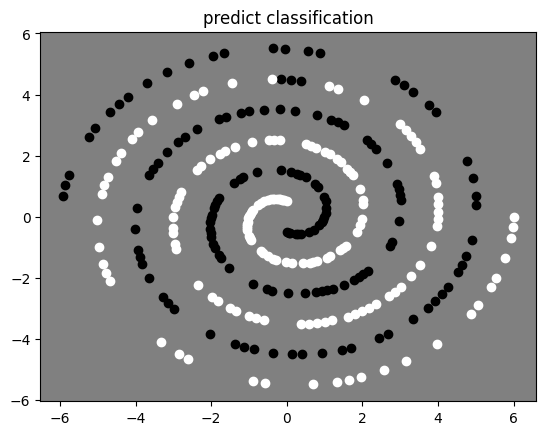

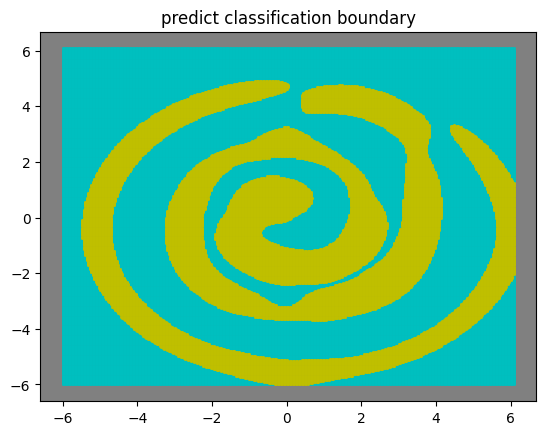

In [17]:
i = 0
time_str = strftime("%Y%m%d%H%M%S", localtime())
for lr in [0.1, 0.1, 0.01, 0.001]:  # compare different learning_rate
    optimizer = tf.keras.optimizers.SGD(lr)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
    if i == 0:
         history = model.fit(train_X, train_y, epochs=training_epochs, verbose=0, batch_size=16, callbacks=[log_display, reduce_lr])  # dynamic learning rate
    else:
        history = model.fit(train_X, train_y, epochs=training_epochs, verbose=0, batch_size=16, callbacks=[log_display])  # fixed learning rate
    i += 1
    evaluate = model.evaluate(test_X, test_y, verbose=0)
    print("Train Finished!", "test [loss, acc] =", evaluate)
    with open ('outputs/mlqp/evaluation-' + time_str +'.txt', 'a+') as f:
        f.write('entropy, accuracy for train data: ' +
                str(history.history['loss'][-1]) + ' ' +
                str(history.history['acc'][-1]) + '\n')
        f.write('entropy, accuracy for test data: ' +  str(evaluate) + '\n\n')

    # plot predict classification for test data
    y_hat = np.argmax(model.predict(test_X, verbose=0), axis=1)
    class_0, class_1 = test_data[y_hat == 0].iloc[:, 0:2], test_data[y_hat == 1].iloc[:, 0:2]
    plot_and_show('predict classification', class_0, class_1, 'ko', 'wo', 'outputs/mlqp/images/predict-' + str(i) + '-'  + time_str + '.png')

    # plot boundary
    X = pd.DataFrame([[x, y] for x in np.arange(-6, 6.1, 0.04) for y in np.arange(-6, 6.1, 0.04)])
    y_hat = np.argmax(model.predict(tf.convert_to_tensor(X), verbose=0), axis=1)
    class_0, class_1 = X[y_hat == 0].iloc[:, 0:2], X[y_hat == 1].iloc[:, 0:2]
    plot_and_show('predict classification boundary', class_0, class_1, 'cs', 'ys', 'outputs/mlqp/images/boundary-' + str(i) + '-'  + time_str + '.png', ms=1)